Given n random samples ($y_i , x_{1i} , . . . , x_{pi}$ ), i = 1, . . . , n, the linear regression models the relation between the observations y i and the independent variables x pi is formulated as
$y_i = β_0 + β_1 x_{1i} + · · · + β_p x_{pi} + ε_i i = 1, . . . , n$<br>
• The β’s are the model parameters, ie, the regression coeficients.<br>
• $β_0$ is the intercept or the bias.<br>
• $ε_i$ are the residuals.<br>
• An independent variable (IV). It is a variable that stands alone and isn’t changed by
the other variables you are trying to measure. For example, someone’s age might be an 
independent variable. Other factors (such as what they eat, how much they go to school,
how much television they watch) aren’t going to change a person’s age. In fact, when
you are looking for some kind of relationship between variables you are trying to see if
the independent variable causes some kind of change in the other variables, or dependent
variables. In Machine Learning, these variables are also called the predictors.<br>
• A dependent variable. It is something that depends on other factors. For example, a test
score could be a dependent variable because it could change depending on several factors
such as how much you studied, how much sleep you got the night before you took the
test, or even how hungry you were when you took it. Usually when you are looking for
a relationship between two things you are trying to find out what makes the dependent
variable change the way it does. In Machine Learning this variable is called a target
variable.

#### Simple regression: test association between two quantitative variables
Using the dataset “salary”, explore the association between the dependant variable (e.g. Salary)
and the independent variable (e.g.: Experience is quantitative).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
url = 'https://raw.github.com/neurospin/pystatsml/master/datasets/salary_table.csv'
salary = pd.read_csv(url)

1. Model the data
Model the data on some hypothesis e.g.: salary is a linear function of the experience.<br>
$salary_i = β experience_i + β_0 + ε_i ,$<br>
more generally<br>
$y_i = β x_i + β_0 + ε_i$<br>
• β: the slope or coefficient or parameter of the model,<br>
• $β_0$ : the intercept or bias is the second parameter of the model,<br>
• $ε_i$ : is the ith error, or residual with ε ∼ $N (0, σ^2 )$.<br>
The simple regression is equivalent to the Pearson correlation.
2. Fit: estimate the model parameters
The goal it so estimate β, $β_0$ and $σ^2$ .
Minimizes the mean squared error (MSE) or the Sum squared error (SSE). The so called Ordinary Least Squares (OLS) finds β, $β_0$ that minimizes the SSE = $\Sigma_{i}ε^2_{i}$<br>
SSE = $\Sigma_{i}(y_i-\beta_{xi}-\beta_{0})^2$

y = 491.486913 x + 13584.043803, r: 0.538886, r-squared: 0.290398,
p-value: 0.000112, std_err: 115.823381
Regression line with the scatterplot


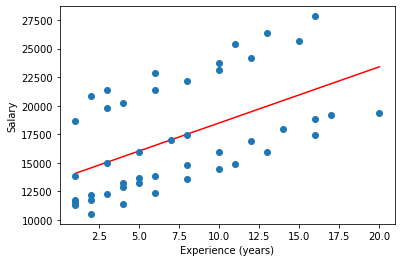

Using seaborn


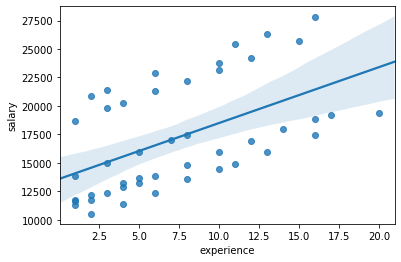

In [2]:
#To find the regression coefficient
from scipy import stats
import numpy as np
y, x = salary.salary, salary.experience
beta, beta0, r_value, p_value, std_err = stats.linregress(x,y)
print("y = %f x + %f, r: %f, r-squared: %f,\np-value: %f, std_err: %f"
% (beta, beta0, r_value, r_value**2, p_value, std_err))
print("Regression line with the scatterplot")
yhat = beta * x + beta0 # regression line
plt.plot(x, yhat, 'r-', x, y,'o')
plt.xlabel('Experience (years)')
plt.ylabel('Salary')
plt.show()
print("Using seaborn")
import seaborn as sns
sns.regplot(x="experience", y="salary", data=salary);

3. F -Test
##### Goodness of fit
The goodness of fit of a statistical model describes how well it fits a set of observations. Mea-
sures of goodness of fit typically summarize the discrepancy between observed values and the
values expected under the model in question. We will consider the explained variance also
known as the coefficient of determination, denoted $R_2$ pronounced R-squared.
The total sum of squares, $SS_{tot}$ is the sum of the sum of squares explained by the regression,
$SS_{reg}$ , plus the sum of squares of residuals unexplained by the regression, $SS_{res}$ , also called the
SSE, i.e. such that<br>
$SS_{tot} = SS_{reg} + SS_{res}$<br>
The mean of y is
$\bar{y} = \frac{1}{n}\Sigma_{i}y_{i}$<br>
The total sum of squares is the total squared sum of deviations from the mean of y, i.e.<br>
$SS_{tot} = \Sigma_{i}(y_i-\bar{y})^2$

In [3]:
import numpy as np
from scipy import linalg
np.random.seed(seed=42) # make the example reproducible
# Dataset
N, P = 50, 4
X = np.random.normal(size= N * P).reshape((N, P))
## Our model needs an intercept so we add a column of 1s:
X[:, 0] = 1
print(X[:5, :])
betastar = np.array([10, 1., .5, 0.1])
e = np.random.normal(size=N)
y = np.dot(X, betastar) + e
# Estimate the parameters
Xpinv = linalg.pinv2(X)
betahat = np.dot(Xpinv, y)
print("Estimated beta:\n", betahat)

[[ 1.         -0.1382643   0.64768854  1.52302986]
 [ 1.         -0.23413696  1.57921282  0.76743473]
 [ 1.          0.54256004 -0.46341769 -0.46572975]
 [ 1.         -1.91328024 -1.72491783 -0.56228753]
 [ 1.          0.31424733 -0.90802408 -1.4123037 ]]
Estimated beta:
 [10.14742501  0.57938106  0.51654653  0.17862194]


In [4]:
# Multiple Regression
#With Numpy
import statsmodels.api as sm
## Fit and summary:
model = sm.OLS(y, X).fit()
print(model.summary())
# prediction of new values
ypred = model.predict(X)
# residuals + prediction == true values
assert np.all(ypred + model.resid == y)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     8.748
Date:                Thu, 10 Oct 2019   Prob (F-statistic):           0.000106
Time:                        12:32:20   Log-Likelihood:                -71.271
No. Observations:                  50   AIC:                             150.5
Df Residuals:                      46   BIC:                             158.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.1474      0.150     67.520      0.0

In [6]:
# Interface With Pandas
import statsmodels.formula.api as smfrmla
df = pd.DataFrame(np.column_stack([X, y]), columns=['inter', 'x1','x2', 'x3', 'y'])
print(df.columns, df.shape)
# Build a model excluding the intercept, it is implicit
model = smfrmla.ols("y~x1 + x2 + x3", df).fit()
print(model.summary())

Index(['inter', 'x1', 'x2', 'x3', 'y'], dtype='object') (50, 5)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     8.748
Date:                Thu, 10 Oct 2019   Prob (F-statistic):           0.000106
Time:                        12:34:09   Log-Likelihood:                -71.271
No. Observations:                  50   AIC:                             150.5
Df Residuals:                      46   BIC:                             158.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

#### Multiple regression with categorical independent variables or factors: Analysis of covariance
(ANCOVA)
Analysis of covariance (ANCOVA) is a linear model that blends ANOVA and linear regression.
ANCOVA evaluates whether population means of a dependent variable (DV) are equal across
levels of a categorical independent variable (IV) often called a treatment, while statistically
controlling for the effects of other quantitative or continuous variables that are not of primary
interest, known as covariates (CV).

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
try:
    salary = pd.read_csv("../datasets/salary_table.csv")
except:
    url = 'https://raw.github.com/neurospin/pystatsml/master/datasets/salary_table.csv'
    salary = pd.read_csv(url)

#### One-way AN(C)OVA
• ANOVA: one categorical independent variable, i.e. one factor.<br>
• ANCOVA: ANOVA with some covariates.

In [9]:
import statsmodels.formula.api as smfrmla
oneway = smfrmla.ols('salary ~ management + experience', salary).fit()
print(oneway.summary())
aov = sm.stats.anova_lm(oneway, typ=2) # Type 2 ANOVA DataFrame
print(aov)

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     138.2
Date:                Thu, 10 Oct 2019   Prob (F-statistic):           1.90e-19
Time:                        12:38:46   Log-Likelihood:                -407.76
No. Observations:                  46   AIC:                             821.5
Df Residuals:                      43   BIC:                             827.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.021e+04    525.999     

#### Two-way AN(C)OVA
Ancova with two categorical independent variables, i.e. two factors.

In [10]:
import statsmodels.formula.api as smfrmla
twoway = smfrmla.ols('salary ~ education + management + experience', salary).fit()
print(twoway.summary())
aov = sm.stats.anova_lm(twoway, typ=2) # Type 2 ANOVA DataFrame
print(aov)

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     226.8
Date:                Thu, 10 Oct 2019   Prob (F-statistic):           2.23e-27
Time:                        12:39:33   Log-Likelihood:                -381.63
No. Observations:                  46   AIC:                             773.3
Df Residuals:                      41   BIC:                             782.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            8035.5976    